In [1]:
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt

In [2]:
rng   = np.random.default_rng(1)
m   = 55
n   = 50
A   = rng.normal( size=(m,n) )
xStar = np.ones( (n,1) )
b   = A@xStar

f   = lambda x : norm(A@x-b)**2/2
grad= lambda x : A.T@( A@x-b )

fStar   = 0
x0      = np.zeros((n,1))

evals = np.linalg.eigvals(A.T@A)
L     = np.max(evals)
mu    = np.min(evals)
kappa = L/mu
print(f"L is {L:.2f}, mu is {mu:.2f}, condition number is {kappa:.2e}")

L is 204.96, mu is 0.17, condition number is 1.17e+03


In [3]:
def gradientDescent(f,grad,stepsize,x0,maxiter=1e3):
    x = x0.copy()
    fHist = []
    for k in range(int(maxiter)):
        x -= stepsize*grad(x)
        fHist.append( f(x) )
    return x, fHist

In [4]:
maxiter = 1e4
x_gd, fHist_gd  = gradientDescent(f,grad,1/L,x0,maxiter=maxiter)

x_gdopti, fHist_gdopti  = gradientDescent(f,grad,2/(L+mu),x0,maxiter=maxiter)

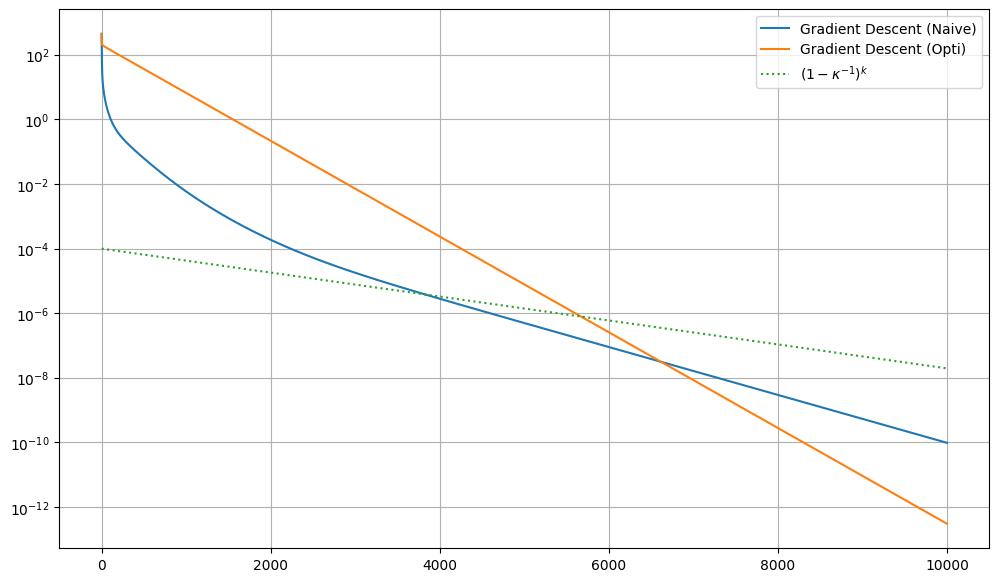

In [5]:
plt.figure(figsize=(12,7))
plt.semilogy( fHist_gd, label='Gradient Descent (Naive)' )
plt.semilogy( fHist_gdopti, label='Gradient Descent (Opti)' )
k = np.arange(1,maxiter)
plt.semilogy(k,1e-4*(1-1/kappa)**k,':',label='$(1-\kappa^{-1})^{k}$')
#plt.ylim(bottom=1e-29,top=1e2)
plt.legend( loc='upper right')
plt.grid()
plt.show()

Code the Heavy Ball method:
$$x^{(k+1)} = x^{(k)} - \alpha \nabla f( x^{(k)}) + \beta (x^{(k)} - x^{(k-1)}) \qquad \text{ for some constants } \alpha>0, \beta\geq 0 . $$

In [ ]:
def MomemtumGradientDescent(f,grad,stepsize,momentum,x0,maxiter=1e3):
    x = x0.copy()
    fHist = []
    # your code here
    return x, fHist

Compute the optimal choices for the stepsize and momentum $\alpha$ and $\beta$.

In [ ]:
# your code here
momentum

In [ ]:
# your code here
step

What happens when momentum is too high? too low?

In [ ]:
# your code here

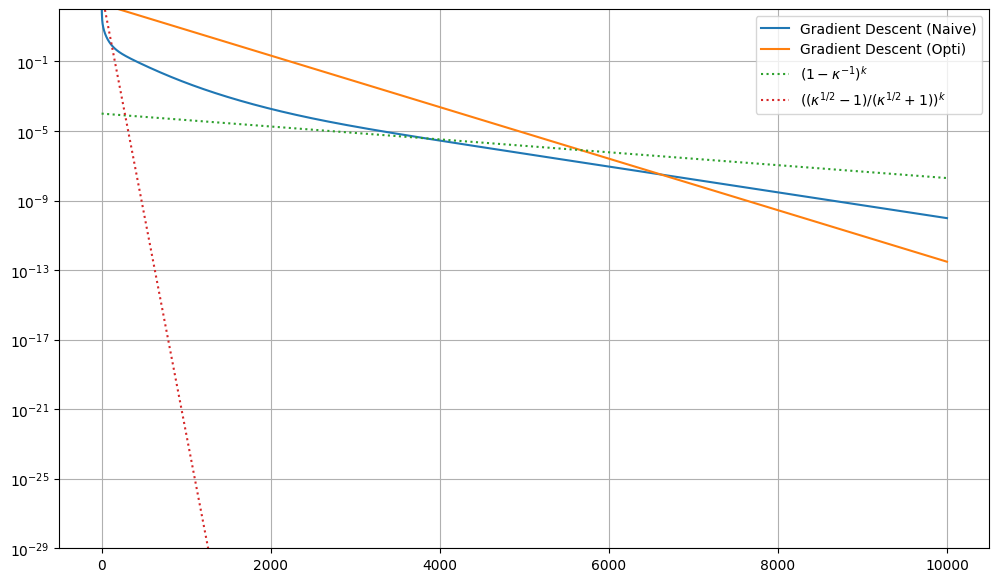

In [6]:
plt.figure(figsize=(12,7))
plt.semilogy( fHist_gd, label='Gradient Descent (Naive)' )
plt.semilogy( fHist_gdopti, label='Gradient Descent (Opti)' )

k = np.arange(1,maxiter)
plt.semilogy(k,1e-4*(1-1/kappa)**k,':',label='$(1-\kappa^{-1})^{k}$')
plt.semilogy(k,1e3*((np.sqrt(kappa)-1)/(np.sqrt(kappa)+1))**k,':',label='$((\kappa^{1/2}-1)/(\kappa^{1/2}+1))^{k}$')
plt.ylim(bottom=1e-29,top=1e2)
plt.legend( loc='upper right')
plt.grid()
plt.show()